<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/epplugins/UTN/main/assets/img/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;">Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase
</td>
</tr>
</table> 

# Campo Eléctrico

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/epplugins/UTN/main/assets/img/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;">Edgardo Palazzo (epalazzo@fra.utn.edu.ar)
</td>
</tr>
</table>

---

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Campo de una carga](#toc1_)    
- 2. [Campo de un sistema de cargas puntuales](#toc2_)    
  - 2.1. [El dipolo eléctrico](#toc2_1_)    
  - 2.2. [Ejercicio 1: dos cargas](#toc2_2_)    
  - 2.3. [Más de dos cargas](#toc2_3_)    
  - 2.4. [Ejercicio 2: problema 11.9](#toc2_4_)    
- 3. [Líneas de campo en 3 dimensiones](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import lib_em as em
import importlib  # Borrar Not needed after final version.


In [53]:
# Borrar
importlib.reload(em)


<module 'lib_em' from '/home/edg/notebooks/UTN/electromagnetismo/lib_em.py'>

## 1. <a id='toc1_'></a>[Campo de una carga](#toc0_)

El campo eléctrico producido por una carga puntual $q_0$ ubicada en la posición $\vec{\text{x}}_0$ puede escribirse como:
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q}{|\vec{\text{r}}|^2} \hat{\text{r}}\, , \tag{1}
$$
donde
  * $|\vec{\text{r}}|$ es la distancia entre la posición de la partícula cargada ($\vec{\text{x}}_0$) y la posición donde se quiere obtener el vector de campo eléctrico ($\vec{\text{x}}$)
  * $\hat{\text{r}}$ es el vector unitario en la dirección desde $\vec{\text{x}}_0$ hacia $\vec{\text{x}}$

según se muestra en la siguiente figura.

<div>
       <a href="https://fra.utn.edu.ar/">
       <image src="https://raw.githubusercontent.com/epplugins/UTN/main/electromagnetismo/img/em01_una_carga.svg">
       </a>
</div>

Si el vector unitario se reescribe como $\hat{r} = \vec{\text{r}}/|\vec{\text{r}}|$, la expresión para el campo resulta:
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q}{|\vec{\text{r}}|^3} \vec{\text{r}}\, . \tag{2}
$$

Para escribir un código que calcule el campo eléctrico es conveniente utilizar una expresión con las coordenadas del punto campo y la posición de la carga explícitas. El código que utilizaremos reproduce la siguiente expresión:
$$
\vec{E}(x,y,z) = \frac{1}{4\pi\varepsilon_0} \frac{q}{\left ((x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2 \right )^{3/2}} \left ( (x-x_0)\hat{i} + (y-y_0)\hat{j} + (z-z_0)\hat{k} \right ) . \tag{3}
$$

Definición de una función que calcula las componentes del campo eléctrico en la posición $(x,y,z)$ cuando se tiene una carga de $1~\text{nC}$ en el origen:

In [2]:
def E(x,y,z):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    """
    q = 1E-9
    x0 = 0
    y0 = 0
    z0 = 0

    r = ((x - x0)**2 + (y - y0)**2 + (z - z0)**2)**(3/2)
    Ei = 9E9 * q * (x - x0) / r
    Ej = 9E9 * q * (y - y0) / r
    Ek = 9E9 * q * (z - z0) / r

    return Ei, Ej, Ek

Si queremos el vector campo eléctrico en alguna posición, simplemente se ingresan los valores de $x,y,z$:

In [3]:
E(-1,0,0)

(-9.0, 0.0, 0.0)

Veamos las líneas de campo de una única carga puntual:

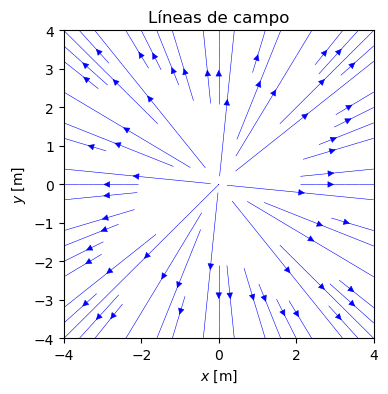

In [72]:
# El objetivo principal de este cuaderno es el cálculo de campos eléctricos. Por tal motivo el código para la creación de gráficos avanzados como este no se muestra explícitamente, y se importan de la librería lib_em.py. En otros cuadernos más avanzados se puede experimentar en la creación de gráficos. 

em.plotE(E, dx=4, title='Líneas de campo')

## 2. <a id='toc2_'></a>[Campo de un sistema de cargas puntuales](#toc0_)

El campo total producido por un sistema de $N$ cargas puntuales es la suma de los campos de cada carga (ver ecuación (2) para el campo de una única carga):
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \sum_{i=1}^N \frac{q_i}{|\vec{\text{r}}_i|^3} \vec{\text{r}}_i\, , \tag{4}
$$

donde
* $q_i$ es la carga eléctrica de la partícula i-ésima 
* $\vec{\text{r}}_i$ es el vector diferencia entre la posición donde se quiere obtener el vector de campo eléctrico ($\vec{\text{x}}$) y la posición de la partícula cargada ($\vec{\text{x}}_i$) : $\vec{\text{r}}_i = (x-x_i)\hat{i} + (y-y_i)\hat{j} + (z-z_i)\hat{k} $

### 2.1. <a id='toc2_1_'></a>[El dipolo eléctrico](#toc0_)

Un dipolo es un sistema de dos cargas eléctricas de igual módulo pero signos opuestos, separadas por una distancia $d$. Para calcular el campo total podemos extender el código utilizado anteriormente agregando los datos de la segunda carga y sumando:

In [93]:
def E2(x,y,z):
    """Calcula las componentes del campo eléctrico en N/C de un sistema de 2 cargas.
    Ingresar valores de x,y,z en metros y q en coulomb.
    """
    q1 = -1E-9
    x1 = -2
    y1 = 0
    z1 = 0

    q2 = 1E-9
    x2 = 2
    y2 = 0
    z2 = 0

    r = ((x - x1)**2 + (y - y1)**2 + (z - z1)**2)**(3/2)
    Ei1 = 9E9 * q1 * (x - x1) / r
    Ej1 = 9E9 * q1 * (y - y1) / r
    Ek1 = 9E9 * q1 * (z - z1) / r

    r = ((x - x2)**2 + (y - y2)**2 + (z - z2)**2)**(3/2)
    Ei2 = 9E9 * q2 * (x - x2) / r
    Ej2 = 9E9 * q2 * (y - y2) / r
    Ek2 = 9E9 * q2 * (z - z2) / r

    return Ei1+Ei2, Ej1+Ej2, Ek1+Ek2

Verifiquemos que nuestro código funciona correctamente, calculando los vectores E en diferentes posiciones:

In [103]:
print("E(0,0,0) = ", E2(0,0,0))
print("E(1,0,0) = ", E2(1,0,0))
print("E(4,0,0) = ", E2(4,0,0))
print("E(-4,0,0) = ", E2(-4,0,0))
print("E(0,2,0) = ", E2(0,2,0))
print("E(0,0,2) = ", E2(0,0,2))
print("E(2,2,0) = ", E2(2,2,0))
print("E(-2,2,0) = ", E2(-2,2,0))
print("E(0,2,2) = ", E2(0,2,2))

E(0,0,0) =  (-4.5, 0.0, 0.0)
E(1,0,0) =  (-10.0, 0.0, 0.0)
E(4,0,0) =  (2.0, 0.0, 0.0)
E(-4,0,0) =  (2.0, 0.0, 0.0)
E(0,2,0) =  (-1.590990257669732, 0.0, 0.0)
E(0,0,2) =  (-1.590990257669732, 0.0, 0.0)
E(2,2,0) =  (-0.40249223594996214, 2.048753882025019, 0.0)
E(-2,2,0) =  (-0.40249223594996214, -2.048753882025019, 0.0)
E(0,2,2) =  (-0.8660254037844386, 0.0, 0.0)


In [91]:
# Gráfico de los vectores.

Las líneas de campo eléctrico del dipolo:

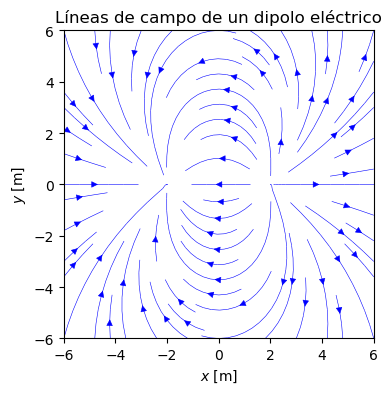

In [99]:
em.plotE(E2, dx=6, title='Líneas de campo de un dipolo eléctrico')

### 2.2. <a id='toc2_2_'></a>[Ejercicio 1: dos cargas](#toc0_)

Experimentar modificando la definición de la función E2 para obtener las líneas de campo de distintas configuraciones.

In [105]:
# Función E2 modificada.
def E2mod(x,y,z):
    # El nuevo código.



In [ ]:
# Generar las líneas de campo.

### 2.3. <a id='toc2_3_'></a>[Más de dos cargas](#toc0_)

El código que usamos anteriormente no es útil cuando se trabaja con muchas cargas.

Además, ahora las cargas pueden no formar un plano, y en ese caso el gráfico de las líneas de campo puede ser muy complicado. Por el momento trabajemos con cargas ubicadas en el plano $xy$, es decir $z=0$.

Para extender nuestro cálculo, en los parámetros de la función agregamos una lista con las cargas y sus posiciones.

In [8]:
def Ef(x, y, z, Q):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1,z1],
        [q2,x2,y2,z2],
        ...
        [qN,xN,yN,zN]
    ]
    """
    Ei,Ej,Ek = 0,0,0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2 + (z - qi[3])**2)**(3/2)
        Ei = Ei + 9E9 * qi[0] * (x - qi[1]) / r
        Ej = Ej + 9E9 * qi[0] * (y - qi[2]) / r
        Ek = Ek + 9E9 * qi[0] * (z - qi[3]) / r

    return Ei, Ej, Ek

A continuación se calcula el campo producido por 3 cargas: q1 = 5 nC en (0,0,0), q2 = -3 nC en (-2,0,0) y q3 = 7 nC en (2,3,0), en distintos puntos.

In [54]:
Q = [
    [5E-9,0,0,0],
    [-3E-9,-2,0,0],
    [7E-9,2,3,0],
]
print("E(1,0,0) = ", np.round(Ef(1,0,0,Q), decimals=3))
print("E(1,-2,0) = ", np.round(Ef(1,-2,0,Q), decimals=3))
print("E(-4,0,0) = ", np.round(Ef(-4,0,0,Q), decimals=3))
print("E(0,0,2) = ", np.round(Ef(0,0,2,Q), decimals=3))
print("E(0,2,0) = ", np.round(Ef(0,2,0,Q), decimals=3))


E(1,0,0) =  [40.008 -5.977  0.   ]
E(1,-2,0) =  [ 1.822 -9.274  0.   ]
E(-4,0,0) =  [ 2.685 -0.626  0.   ]
E(0,0,2) =  [-4.184 -2.696 10.661]
E(0,2,0) =  [-13.656   3.229   0.   ]


In [10]:
# Gráfico mostrando los vectores.

Veamos las líneas de campo de esta distribución.

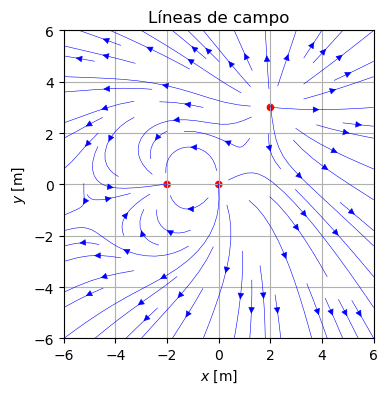

In [55]:
em.plotEf(Ef, Q, dx=6)

### 2.4. <a id='toc2_4_'></a>[Ejercicio 2: problema 11.9](#toc0_)

1. Resolver el problema 11.9 utilizando el código de esta sección.
1. Graficar las líneas de campo de esta distribución de cargas.
1. A partir del gráfico localizar posiciones donde el campo es aproximadamente: i) horizontal, ii) vertical. Verificar que sus elecciones de dichas posiciones sean correctas calculando el campo con la función que estamos utilizando.



In [21]:
# Solución

## 3. <a id='toc3_'></a>[Líneas de campo en 3 dimensiones](#toc0_)

¿Se puede hacer interactivo?

In [1]:
Q = [
    [5E-9,0,0,0],
    [-3E-9,-2,0,0],
    [7E-9,2,3,0],
]

In [2]:
q = Q[0]
q

[5e-09, 0, 0, 0]

In [3]:
a,b,c,d = q

In [4]:
a

5e-09

In [5]:
b

0

---

In [56]:
# Ejercicio 2.
y = (0.10**2 - 0.05**2)**0.5
Q = [
    [2E-6,-0.05,0,0],
    [-8E-6,0,y,0],
    [12E-6,0.05,0,0],
]
Ef(0,0,0,Q)
# -36 + 9.6

(-35999999.99999999, 9599999.999999996, 0.0)

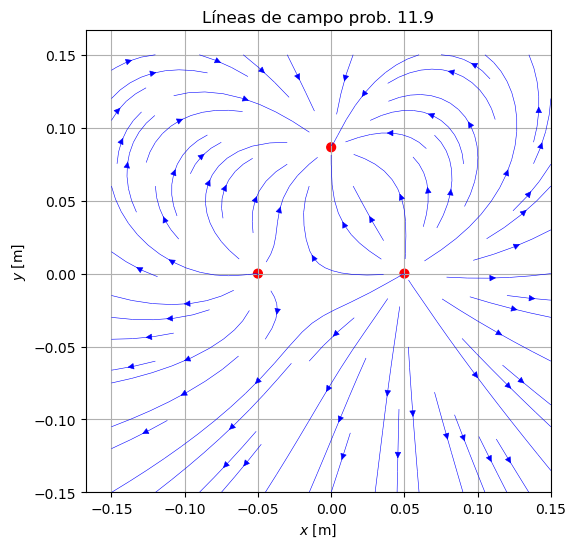

In [58]:
em.plotEf(Ef, Q, dx=0.15, figsize=(6,6), title='Líneas de campo prob. 11.9')


In [52]:
Ef(0.1175,-0.0018,0,Q)


(21658874.76587049, 1363735.517325346, 0.0)

In [92]:
np.round(Ef(-0.085804565,0.05,0,Q), decimals=0)


array([     -0., 8897720.,       0.])